Welcome to Preceptor practice session 11! 

In [25]:
import YData 

#YData.download_practice_code(11)              # Without Answers. 
#YData.download_practice_code(11, True)        # With Answers (won't work before Friday eve.)

#YData.download_data("loan_data.csv")

import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

# Suppress ConvergenceWarning - please ignore this code 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [26]:
# Get our loan data.

loans = pd.read_csv("loan_data.csv")
loans.head()





,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [27]:
# Get the features and the labels.

X_loans_features = loans[[
                              'person_age', 
                              'person_income',
                              'person_emp_exp', 
                              'loan_amnt',
                              'loan_int_rate',
                              'loan_percent_income',
                              'cb_person_cred_hist_length',
                              'credit_score'
                             ]]

y_loans_labels = loans['loan_status']

# 1. Unsupervised learning: k-means clustering

We can do k-means clustering in scikit-learn using the `KMeans()` object.


In [28]:
from sklearn.cluster import KMeans

# fit k-means with 2 clusters. 

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_loans_features)

KMeans(n_clusters=2)

In [29]:
# see which cluster each point belongs to 

predicted_labels = kmeans.predict(X_loans_features)
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
# look at a matrix of which loan types (approved or denied) end up in which cluster. 

matrix = pd.DataFrame({'labels': predicted_labels, 
                       'loan_approval': y_loans_labels})

ct = pd.crosstab(matrix['labels'], matrix['loan_approval'])
print(ct)

loan_approval      0      1
labels                     
0              34997  10000
1                  3      0


- Let us now do clustering with feature normalization. 

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# do clustering with feature normalization 
scaler = StandardScaler()
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(X_loans_features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2))])

In [32]:
# see which cluster each (normalized) point belongs to

predicted_labels2 = pipeline.predict(X_loans_features)

predicted_labels2


array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [33]:
# look at a matrix of which loan types (denied or approved) end up in which cluster 

matrix_new = pd.DataFrame({'labels': predicted_labels2, 
                           'loan_approval': y_loans_labels})

ct_new = pd.crosstab(matrix_new['labels'], 
                     matrix_new['loan_approval'])
print(ct_new)

loan_approval      0     1
labels                    
0              27133  8025
1               7867  1975


# 2. Unsupervised learning: Hierarchical clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

#  Ward's method adds points to a cluster that minimizes the sum of squared differences 
#  within all clusters
clusters = hierarchy.linkage(X_loans_features[0:10000], method="ward")   

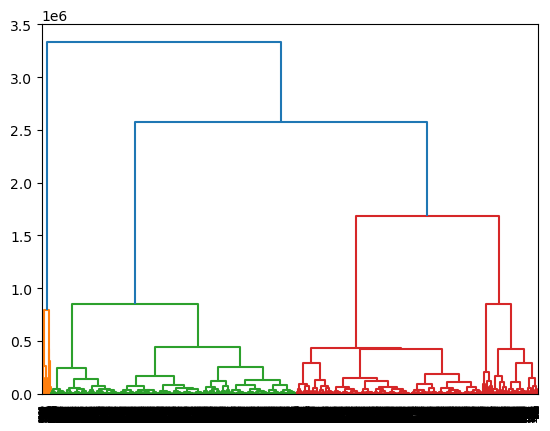

In [35]:
# display a dendrogram
dendrogram = hierarchy.dendrogram(clusters)

In [36]:
# cluster points into 2 clusters 
clustering_model = AgglomerativeClustering(n_clusters=2, linkage="ward")
clustering_model.fit(X_loans_features[0:10000])

# get the predicted cluster for each point
labels = clustering_model.labels_

labels

array([0, 0, 0, ..., 0, 0, 0])

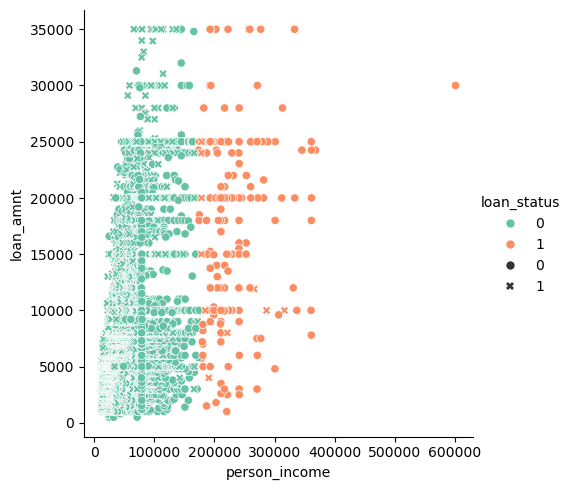

In [37]:
# visualize how well the clustering matches the loan types (denied or approved)

sns.relplot(X_loans_features[0:10000], 
            x='person_income', 
            y='loan_amnt', 
            hue=labels, 
            style = y_loans_labels[0:10000],
            palette="Set2");


# Object-oriented programming

[Object-oriented programming (OOP)](https://en.wikipedia.org/wiki/Object-oriented_programming) is a programming paradigm based on the concept of objects, which can contain data and code: data in the form of fields (often known as attributes or properties), and code in the form of procedures (often known as methods). In OOP, computer programs are designed by making them out of objects that interact with one another.



1. Write a Python program to create a Vehicle class with max_speed and mileage instance attributes.

In [38]:
class Vehicle:
    def __init__(self, max_speed, mileage):
        self.max_speed = max_speed
        self.mileage = mileage

modelX = Vehicle(240, 18)
print(modelX.max_speed, modelX.mileage)

240 18


2. Write a Python program to create a class representing a Circle. Include methods to calculate its area and perimeter.

In [39]:
# Import the math module to access mathematical functions like pi
import math

# Define a class called Circle to represent a circle
class Circle:
    # Initialize the Circle object with a given radius
    def __init__(self, radius):
        self.radius = radius
    
    # Calculate and return the area of the circle using the formula: π * r^2
    def calculate_circle_area(self):
        return math.pi * self.radius**2
    
    # Calculate and return the perimeter (circumference) of the circle using the formula: 2π * r
    def calculate_circle_perimeter(self):
        return 2 * math.pi * self.radius

# Example usage
# Prompt the user to input the radius of the circle and convert it to a floating-point number
radius = float(input("Input the radius of the circle: "))

# Create a Circle object with the provided radius
circle = Circle(radius)

# Calculate the area of the circle using the calculate_circle_area method
area = circle.calculate_circle_area()

# Calculate the perimeter of the circle using the calculate_circle_perimeter method
perimeter = circle.calculate_circle_perimeter()

# Display the calculated area and perimeter of the circle
print("Area of the circle:", area)
print("Perimeter of the circle:", perimeter) 


Input the radius of the circle:  10


Area of the circle: 314.1592653589793
Perimeter of the circle: 62.83185307179586
